# Ejercicio 2

In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

In [2]:
os.getcwd()

'd:\\MultivariateMethods\\Homeworks'

In [37]:
df_experiment = pd.read_csv("D:\MultivariateMethods\Data\Experimental light and nitrate rate measurements ETNP_units.csv")

In [38]:
df_experiment.head()

,Sample,Cruise,Expt,Depth,Light,Treatment_2,Station,Cast,Longitude,Latitude,...,SE_3,NO2.up,NO3.up,NH3.up,PNM_depth,PNM_max,Chl_max,Chl_depth,NitPNM,Nitracline_top
0,#,ID,ID,m,condition,ID,ID,#,deg W,deg N,...,nmol/L/day,nmol/L/day,nmol/L/day,nmol/L/day,m,umol/L,mg/m3,m,umol/L,m
1,1,Ward,RM1,60,DK,Filtered,PS1,17,113.00,10.00,...,2.27,NaN,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
2,2,Ward,RM1,60,DK,Ambient,PS1,17,113.00,10.00,...,0.88,4.16,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
3,3,Ward,RM1,60,LL,Ambient,PS1,17,113.00,10.00,...,0.16,5.44,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
4,4,Ward,RM1,60,ML,Ambient,PS1,17,113.00,10.00,...,0.21,7.08,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN


In [39]:
len(df_experiment)

88

#### Extracting the first row (units of the variables) and removing it from the dataframe

In [40]:
units_dict = df_experiment.iloc[0].to_dict()
df_experiment = df_experiment.drop(0).reset_index(drop=True)
print(units_dict)

{'Sample': '#', 'Cruise': 'ID', 'Expt': 'ID', 'Depth': 'm', 'Light': 'condition', 'Treatment_2': 'ID', 'Station': 'ID', 'Cast': '#', 'Longitude': 'deg W', 'Latitude': 'deg N', 'SigmaT': 'kg/m3', 'Salinity': 'PSU', 'Temp': 'deg C', 'Oxygen': 'umol/L', 'NO2': 'umol/L', 'NO3': 'umol/L', 'NH4': 'nmol/L', 'Chl_SP': 'mg/m3', 'pPAR': '%', 'Inc.PAR': '%', 'NH3.Ox.12': 'nmol/L/day', 'Stdev_4': 'nmol/L/day', 'SE_4': 'nmol/L/day', 'NO2.Ox.12': 'nmol/L/day', 'Stdev_2': 'nmol/L/day', 'SE_2': 'nmol/L/day', 'NO3.Red.12': 'nmol/L/day', 'Stdev_3': 'nmol/L/day', 'SE_3': 'nmol/L/day', 'NO2.up': 'nmol/L/day', 'NO3.up': 'nmol/L/day', 'NH3.up': 'nmol/L/day', 'PNM_depth': 'm', 'PNM_max': 'umol/L', 'Chl_max': 'mg/m3', 'Chl_depth': 'm', 'NitPNM': 'umol/L', 'Nitracline_top': 'm'}


In [41]:
units_dict

{'Sample': '#',
 'Cruise': 'ID',
 'Expt': 'ID',
 'Depth': 'm',
 'Light': 'condition',
 'Treatment_2': 'ID',
 'Station': 'ID',
 'Cast': '#',
 'Longitude': 'deg W',
 'Latitude': 'deg N',
 'SigmaT': 'kg/m3',
 'Salinity': 'PSU',
 'Temp': 'deg C',
 'Oxygen': 'umol/L',
 'NO2': 'umol/L',
 'NO3': 'umol/L',
 'NH4': 'nmol/L',
 'Chl_SP': 'mg/m3',
 'pPAR': '%',
 'Inc.PAR': '%',
 'NH3.Ox.12': 'nmol/L/day',
 'Stdev_4': 'nmol/L/day',
 'SE_4': 'nmol/L/day',
 'NO2.Ox.12': 'nmol/L/day',
 'Stdev_2': 'nmol/L/day',
 'SE_2': 'nmol/L/day',
 'NO3.Red.12': 'nmol/L/day',
 'Stdev_3': 'nmol/L/day',
 'SE_3': 'nmol/L/day',
 'NO2.up': 'nmol/L/day',
 'NO3.up': 'nmol/L/day',
 'NH3.up': 'nmol/L/day',
 'PNM_depth': 'm',
 'PNM_max': 'umol/L',
 'Chl_max': 'mg/m3',
 'Chl_depth': 'm',
 'NitPNM': 'umol/L',
 'Nitracline_top': 'm'}

In [42]:
df_experiment.head()

,Sample,Cruise,Expt,Depth,Light,Treatment_2,Station,Cast,Longitude,Latitude,...,SE_3,NO2.up,NO3.up,NH3.up,PNM_depth,PNM_max,Chl_max,Chl_depth,NitPNM,Nitracline_top
0,1,Ward,RM1,60,DK,Filtered,PS1,17,113.00,10.00,...,2.27,NaN,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
1,2,Ward,RM1,60,DK,Ambient,PS1,17,113.00,10.00,...,0.88,4.16,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
2,3,Ward,RM1,60,LL,Ambient,PS1,17,113.00,10.00,...,0.16,5.44,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
3,4,Ward,RM1,60,ML,Ambient,PS1,17,113.00,10.00,...,0.21,7.08,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
4,5,Ward,RM1,60,HL,Ambient,PS1,17,113.00,10.00,...,0.30,5.93,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN


### EDA

In [43]:
df_experiment.columns

Index(['Sample', 'Cruise', 'Expt', 'Depth', 'Light', 'Treatment_2', 'Station',
       'Cast', 'Longitude', 'Latitude', 'SigmaT', 'Salinity', 'Temp', 'Oxygen',
       'NO2', 'NO3', 'NH4', 'Chl_SP', 'pPAR', 'Inc.PAR', 'NH3.Ox.12',
       'Stdev_4', 'SE_4', 'NO2.Ox.12', 'Stdev_2', 'SE_2', 'NO3.Red.12',
       'Stdev_3', 'SE_3', 'NO2.up', 'NO3.up', 'NH3.up', 'PNM_depth', 'PNM_max',
       'Chl_max', 'Chl_depth', 'NitPNM', 'Nitracline_top'],
      dtype='object')

In [44]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sample          86 non-null     object
 1   Cruise          86 non-null     object
 2   Expt            86 non-null     object
 3   Depth           86 non-null     object
 4   Light           86 non-null     object
 5   Treatment_2     86 non-null     object
 6   Station         86 non-null     object
 7   Cast            86 non-null     object
 8   Longitude       86 non-null     object
 9   Latitude        86 non-null     object
 10  SigmaT          86 non-null     object
 11  Salinity        86 non-null     object
 12  Temp            86 non-null     object
 13  Oxygen          86 non-null     object
 14  NO2             86 non-null     object
 15  NO3             86 non-null     object
 16  NH4             86 non-null     object
 17  Chl_SP          86 non-null     object
 18  pPAR        

In [47]:
df_experiment=df_experiment.drop(['Sample'],axis=1)

In [48]:
# Convert columns that should be numeric to numeric types (forcing conversion of errors to NaN)
columns_to_convert = ['Depth', 'Station', 'Cast', 'Longitude', 'Latitude', 'SigmaT', 'Salinity', 'Temp', 'Oxygen', 'NO2', 'NO3', 'NH4', 'Chl_SP', 'pPAR', 'Inc.PAR', 'NH3.Ox.12',
       'Stdev_4', 'SE_4', 'NO2.Ox.12', 'Stdev_2', 'SE_2', 'NO3.Red.12',
       'Stdev_3', 'SE_3', 'NO2.up', 'NO3.up', 'NH3.up', 'PNM_depth', 'PNM_max',
       'Chl_max', 'Chl_depth', 'NitPNM', 'Nitracline_top']
df_experiment[columns_to_convert] = df_experiment[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Separate numeric and categorical columns
numeric_cols = df_experiment.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_experiment.select_dtypes(include=['object']).columns

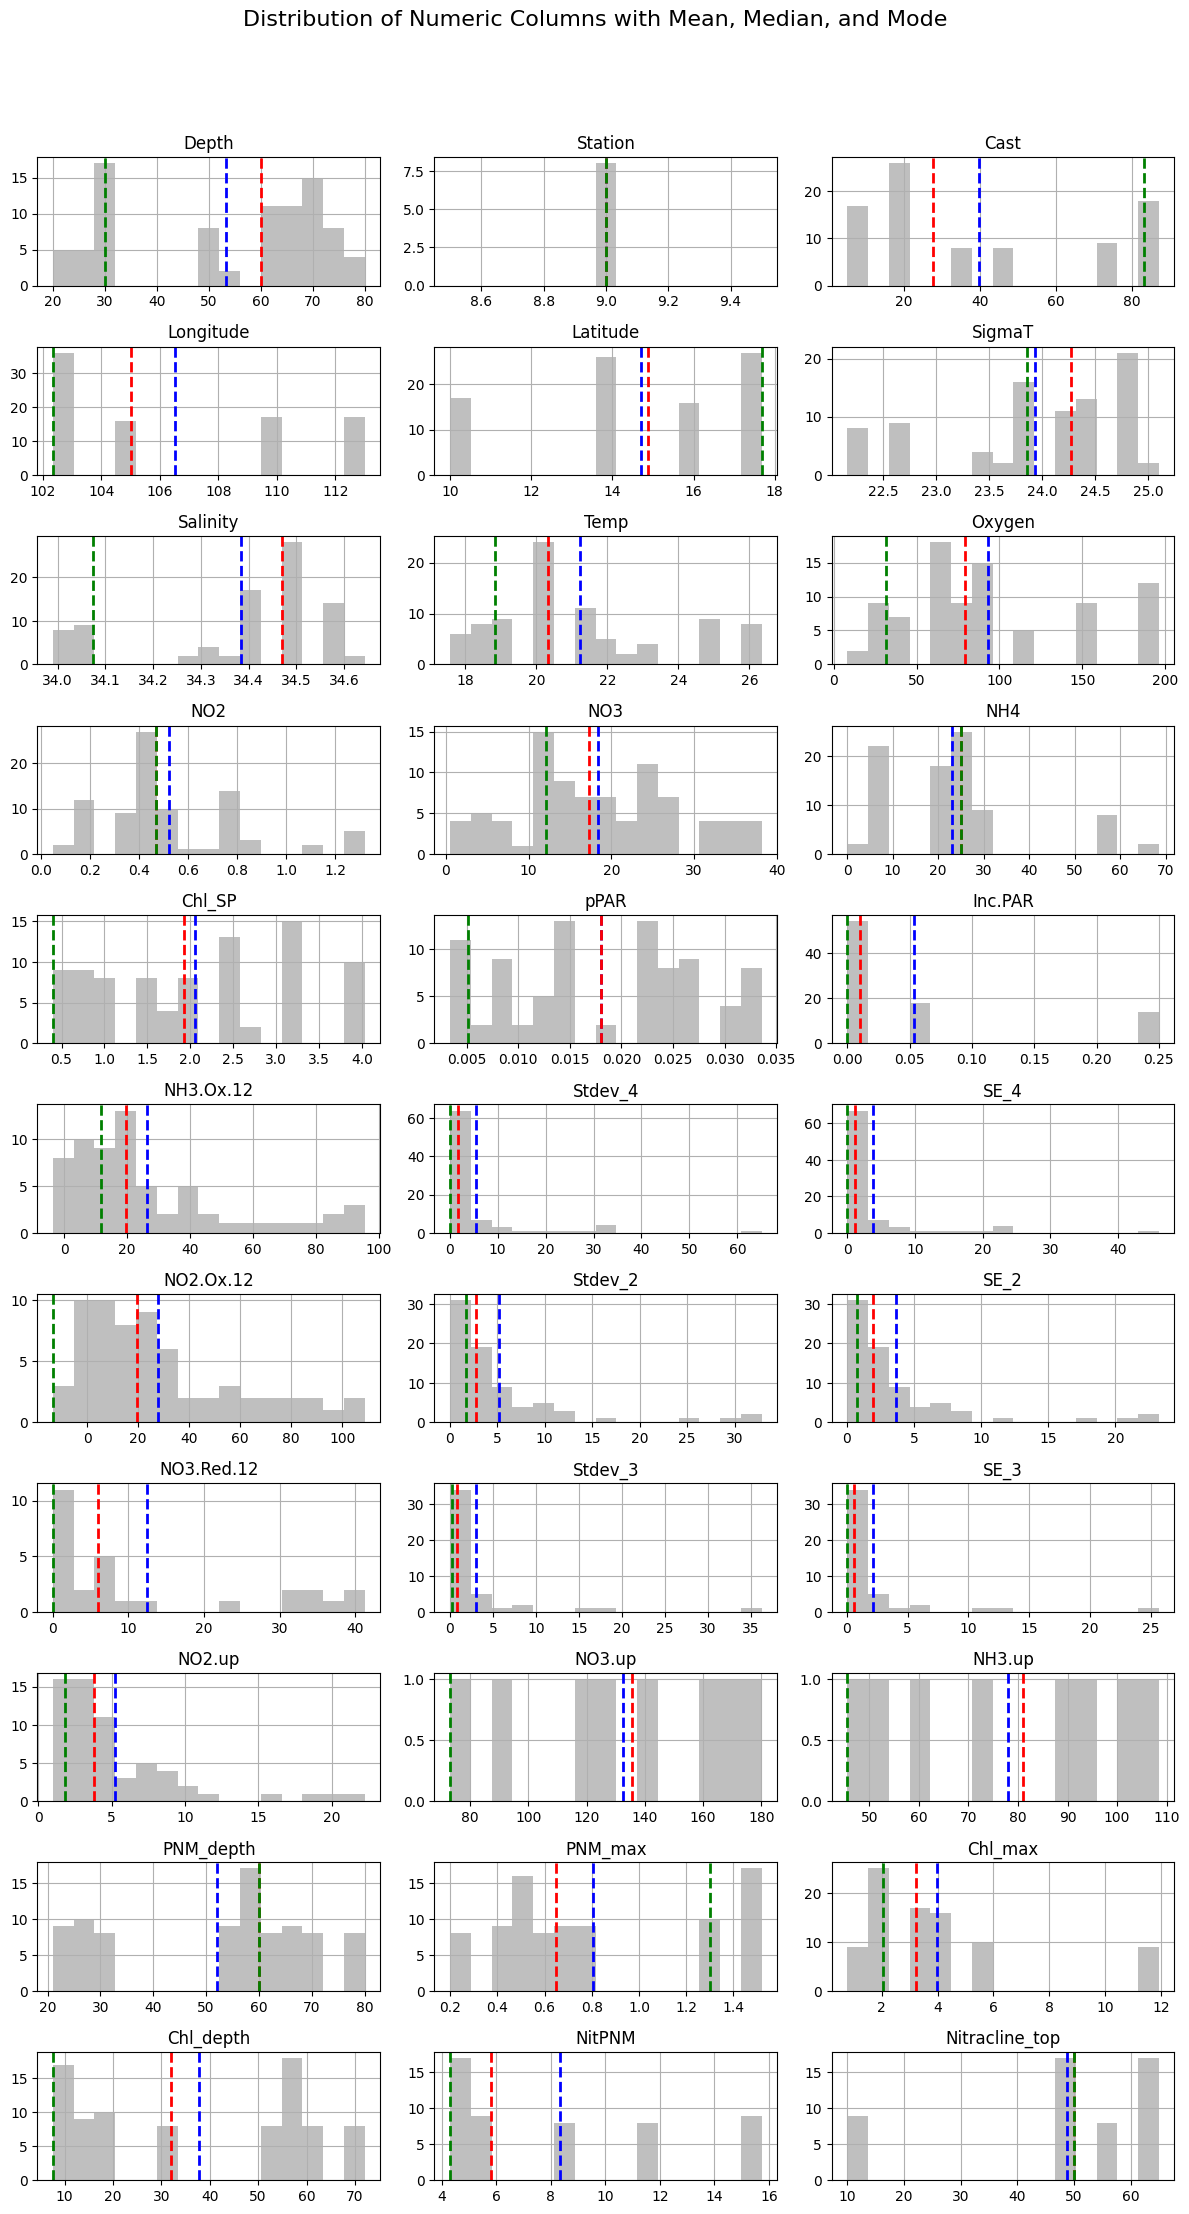

In [49]:
# Ajustar el tamaño de los gráficos
plt.figure(figsize=(12, 25))

# Iterar sobre las columnas numéricas
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)
    df_experiment[col].hist(bins=15, alpha=0.5, color='gray')

    # Calcular media, mediana y moda
    mean_value = df_experiment[col].mean()
    median_value = df_experiment[col].median()
    mode_value = df_experiment[col].mode()[0]  # La moda puede devolver múltiples valores, seleccionamos el primero

    # Agregar las líneas de colores
    plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
    
    plt.title(col)

plt.suptitle('Distribution of Numeric Columns with Mean, Median, and Mode', size=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar para que el título no se superponga
plt.show()

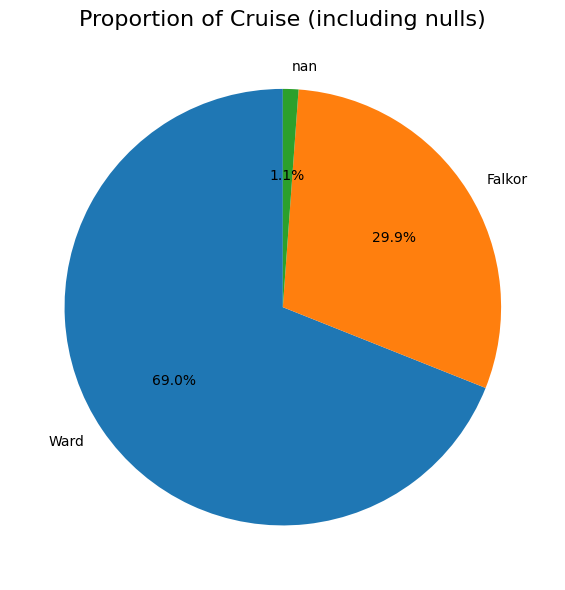

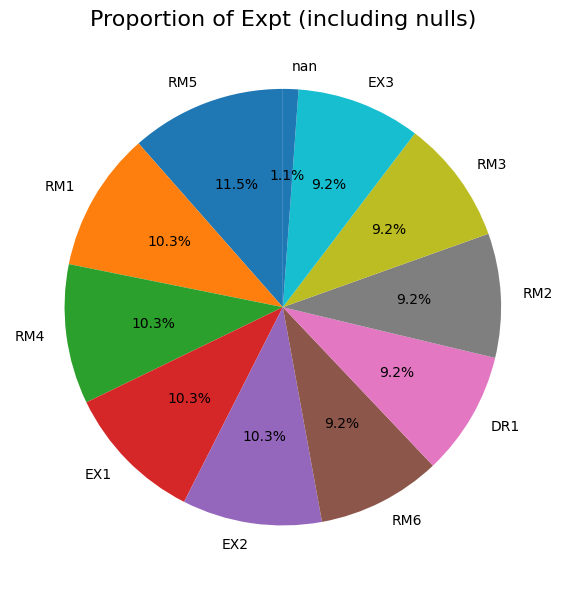

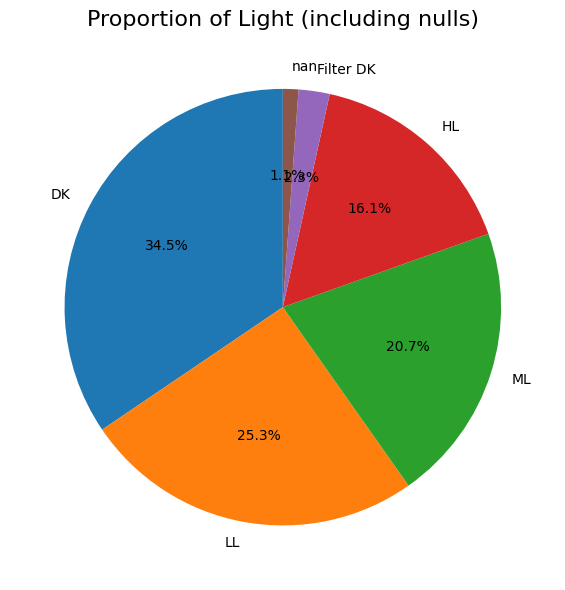

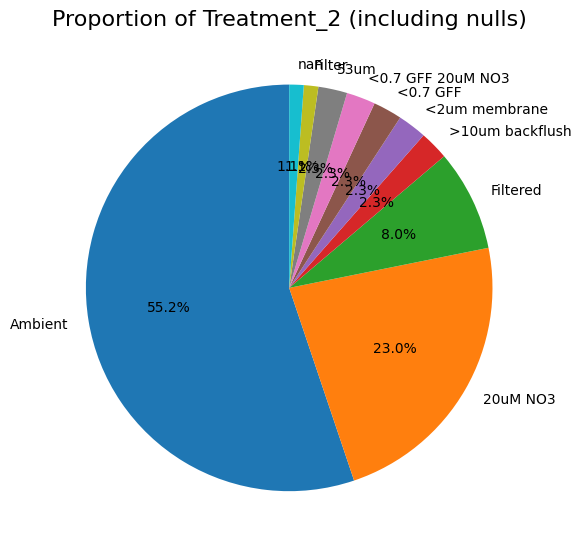

In [50]:
# Plotting pie charts for categorical columns, including null values
for col in categorical_cols:
    value_counts = df_experiment[col].value_counts(dropna=False)
    labels = [str(i) for i in value_counts.index]
    
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of {col} (including nulls)', size=16)
    plt.tight_layout()
    plt.show()

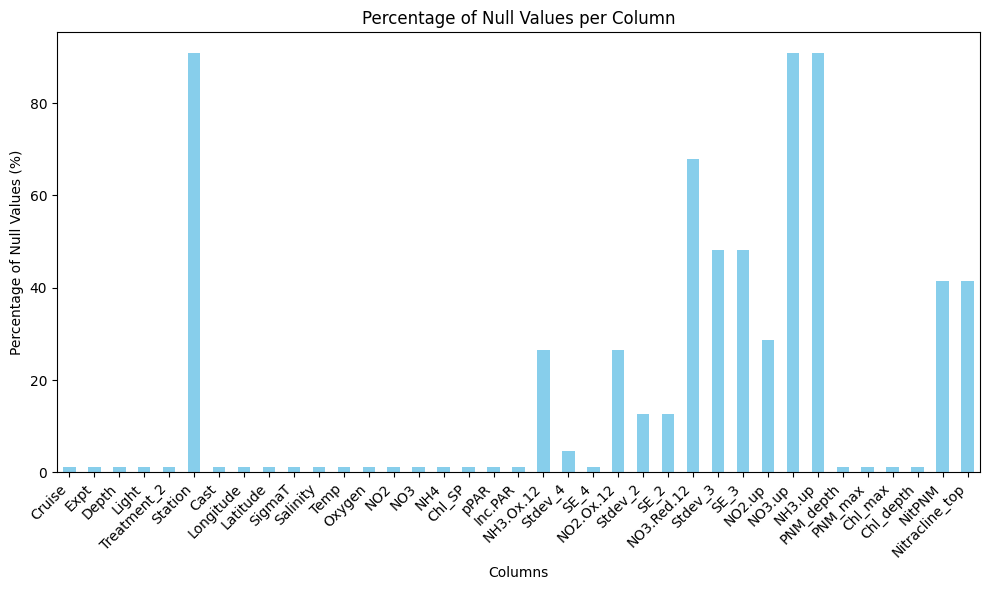

In [51]:
# Counting the percentage of null values per column
null_percentage = df_experiment.isnull().mean() * 100

# Plotting the percentage of null values per column
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

El tratamiento de los nulos lo estamos haciendo arbitrariamente

In [52]:
# Definir el umbral del 50% para los valores nulos
threshold = 0.5

# Calcular el porcentaje de valores nulos en cada columna
missing_percentage = df_experiment.isnull().mean()

# 1. Eliminar las columnas que tienen más del 50% de valores nulos
cols_to_drop = missing_percentage[missing_percentage >= threshold].index
df_experiment = df_experiment.drop(columns=cols_to_drop)

# 2. Para las columnas con menos del 50% de valores nulos:
for col in df_experiment.columns:
    if df_experiment[col].isnull().sum() > 0:  # Si hay valores nulos
        if df_experiment[col].dtype in ['float64', 'int64']:  # Si la columna es numérica
            # Reemplazar los valores nulos con la media de la columna
            mean_value = df_experiment[col].mean()
            df_experiment[col].fillna(mean_value, inplace=True)
        elif df_experiment[col].dtype == 'object':  # Si la columna es categórica
            # Reemplazar los valores nulos con el valor más frecuente (moda)
            mode_value = df_experiment[col].mode()[0]
            df_experiment[col].fillna(mode_value, inplace=True)

# Ver el DataFrame modificado
df_experiment.head()

,Cruise,Expt,Depth,Light,Treatment_2,Cast,Longitude,Latitude,SigmaT,Salinity,...,SE_2,Stdev_3,SE_3,NO2.up,PNM_depth,PNM_max,Chl_max,Chl_depth,NitPNM,Nitracline_top
0,Ward,RM1,60.0,DK,Filtered,17.0,113.0,10.0,23.86,34.39,...,1.690000,3.22,2.27,5.21371,55.0,1.49,3.16,58.0,8.359412,48.72549
1,Ward,RM1,60.0,DK,Ambient,17.0,113.0,10.0,23.86,34.39,...,3.638421,1.24,0.88,4.16000,55.0,1.49,3.16,58.0,8.359412,48.72549
2,Ward,RM1,60.0,LL,Ambient,17.0,113.0,10.0,23.86,34.39,...,3.330000,0.22,0.16,5.44000,55.0,1.49,3.16,58.0,8.359412,48.72549
3,Ward,RM1,60.0,ML,Ambient,17.0,113.0,10.0,23.86,34.39,...,1.960000,0.30,0.21,7.08000,55.0,1.49,3.16,58.0,8.359412,48.72549
4,Ward,RM1,60.0,HL,Ambient,17.0,113.0,10.0,23.86,34.39,...,1.940000,0.42,0.30,5.93000,55.0,1.49,3.16,58.0,8.359412,48.72549


#### Identificar una variable objetivo (etiqueta) y las variables predictoras 

# 1. Plantear el problema de clasificación

Falta justificar, pero un calsificador multiclase de la luz

In [53]:
df_experiment["Light"].value_counts(normalize=True)

Light
DK           0.356322
LL           0.252874
ML           0.206897
HL           0.160920
Filter DK    0.022989
Name: proportion, dtype: float64

In [54]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cruise          87 non-null     object 
 1   Expt            87 non-null     object 
 2   Depth           87 non-null     float64
 3   Light           87 non-null     object 
 4   Treatment_2     87 non-null     object 
 5   Cast            87 non-null     float64
 6   Longitude       87 non-null     float64
 7   Latitude        87 non-null     float64
 8   SigmaT          87 non-null     float64
 9   Salinity        87 non-null     float64
 10  Temp            87 non-null     float64
 11  Oxygen          87 non-null     float64
 12  NO2             87 non-null     float64
 13  NO3             87 non-null     float64
 14  NH4             87 non-null     float64
 15  Chl_SP          87 non-null     float64
 16  pPAR            87 non-null     float64
 17  Inc.PAR         87 non-null     float

In [70]:
# Separar las características (X) y la variable objetivo (y)
# Aquí asumo que "Light" es la columna objetivo a predecir
X = df_experiment.drop('Light', axis=1)
y = df_experiment['Light']

In [71]:
# Convertir variables categóricas a numéricas si es necesario
# Usar LabelEncoder para las etiquetas si no están en formato numérico
le = LabelEncoder()
y = le.fit_transform(y)

In [76]:
# Convertir las columnas categóricas en variables dummy utilizando pd.get_dummies()
X = pd.get_dummies(X, drop_first=True)

# 2. Proponer un clasificador y argumentar por qué ese se nos hace apropiado

# 3. Dividir los datos en conjunto de entrenamiento y prueba. Evaluar el clasificador

In [85]:
# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [88]:
# Definir los modelos a probar
modelos = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA (Linear Discriminant Analysis)": LinearDiscriminantAnalysis()
}

# Diccionario para almacenar los resultados
resultados = {}

# Evaluar cada modelo con cross-validation
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
    resultados[nombre] = scores.mean()

# Imprimir los resultados
for nombre, score in resultados.items():
    print(f"{nombre}: {score:.4f}")

# Entrenar y evaluar el mejor modelo
mejor_modelo = max(resultados, key=resultados.get)
print(f"\nMejor modelo: {mejor_modelo}")

modelo_final = modelos[mejor_modelo]
modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)

# Mostrar métricas del mejor modelo
print("\nReporte de clasificación del mejor modelo:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

K-Nearest Neighbors: 0.1000
Naive Bayes: 0.5813
LDA (Linear Discriminant Analysis): 0.9714

Mejor modelo: LDA (Linear Discriminant Analysis)

Reporte de clasificación del mejor modelo:
              precision    recall  f1-score   support

          DK       1.00      0.86      0.92         7
   Filter DK       0.50      1.00      0.67         1
          HL       1.00      1.00      1.00         1
          LL       1.00      1.00      1.00         5
          ML       1.00      1.00      1.00         4

    accuracy                           0.94        18
   macro avg       0.90      0.97      0.92        18
weighted avg       0.97      0.94      0.95        18



C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
